In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
import seaborn as sns

In [30]:
df=pd.read_csv('Dataset_n.csv')
df.columns=['ID','Gender','Daily spent time in social media (hour)','Are you happy with current situation?',
    'Do you start your day by planning(y/n)','Blood_pressure','Do you feel yourself depressed in a hostile situation?',   
    'Do you feel confident when you start any project?',
           'I try to do better than what is expected from me','Concerned about life (a) or goes too easy on life (b).',
    'Estimated work time per day.','Do you feel guilty if you use spare time to relax?',
    'Do you need to win in order to derive enjoyment from games and sports?',
    'Do you often try to do more than one thing at a time?','Do you find it difficult and frustrating to wait in line?',
    'Are you more of a morning person?','Would you consider yourself to be a perfectionist?']

df

,ID,Gender,Daily spent time in social media (hour),Are you happy with current situation?,Do you start your day by planning(y/n),Blood_pressure,Do you feel yourself depressed in a hostile situation?,Do you feel confident when you start any project?,I try to do better than what is expected from me,Concerned about life (a) or goes too easy on life (b).,Estimated work time per day.,Do you feel guilty if you use spare time to relax?,Do you need to win in order to derive enjoyment from games and sports?,Do you often try to do more than one thing at a time?,Do you find it difficult and frustrating to wait in line?,Are you more of a morning person?,Would you consider yourself to be a perfectionist?
0,151341021,Male,2019-05-02 00:00:00,Yes,No,Low,Maybe,Yes,True,A,3 hrs,No,No,Yes,Yes,No,Yes
1,151341012,Male,Below 1 hour,Yes,Maybe,Normal,No,No,True,B,4,Maybe,Maybe,No,Yes,Maybe,No
2,151341008,Female,2019-05-02 00:00:00,No,Maybe,Low,Yes,No,False,B,8 hour,No,Yes,Yes,Yes,Yes,No
3,151341011,Male,2019-05-02 00:00:00,No,No,Normal,Yes,Yes,True,A,3hour,Maybe,No,Yes,Maybe,No,Maybe
4,151341029,Male,Below 1 hour,Maybe,No,Normal,No,Yes,True,A,10,Maybe,No,Yes,Maybe,No,Yes
5,151341005,Female,2019-05-02 00:00:00,Yes,No,Normal,Yes,No,False,A,5,No,Yes,Yes,Yes,Yes,No
6,151341006,Female,Above 5 hour,No,No,Normal,No,No,True,A,2 hour,Maybe,Yes,Maybe,Yes,No,No
7,151341023,Female,2019-05-02 00:00:00,No,Maybe,Low,No,No,True,B,3/4 hours,Maybe,Yes,Maybe,Yes,No,Maybe
8,151341009,Female,2019-05-02 00:00:00,Yes,Yes,Normal,Yes,Yes,True,A,0,Yes,No,No,Maybe,No,No
9,151341014,Male,2019-05-02 00:00:00,Maybe,No,Normal,Maybe,No,False,A,2,No,No,Maybe,Yes,No,No


In [31]:
df=df.drop(df.columns[[0,1,2,3,4,5,6,7,8,11,12,13,14,15,16]],axis=1)
df

,Concerned about life (a) or goes too easy on life (b).,Estimated work time per day.
0,A,3 hrs
1,B,4
2,B,8 hour
3,A,3hour
4,A,10
5,A,5
6,A,2 hour
7,B,3/4 hours
8,A,0
9,A,2


In [32]:
df['Concerned about life (a) or goes too easy on life (b).'].replace({
    'A': 1,
    'B': 2
}, inplace = True)

In [33]:
labelEncoder = LabelEncoder()
labelEncoder.fit(df['Estimated work time per day.'])
df['Estimated work time per day.'] = labelEncoder.transform(df['Estimated work time per day.'])

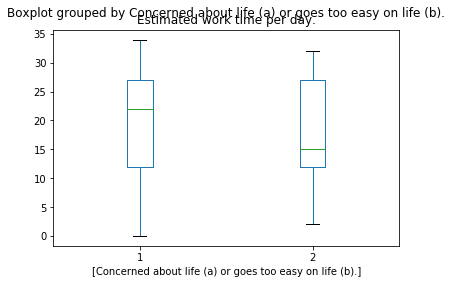

In [34]:
df.boxplot(by=['Concerned about life (a) or goes too easy on life (b).'], column=['Estimated work time per day.'], grid= False)